In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy

Set up the functions we will use to do the analysis and produce the diagrams later on

In [2]:
import requests
def update():
    url='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
    r = requests.get(url, allow_redirects=True)
    open('covid.csv', 'wb').write(r.content)

In [3]:
def isolate_country(name):
    df=pandas.read_csv('covid.csv',on_bad_lines='skip')
    df1=df[df.geoId==name]
    df1 = df1[df1.cases!=0][['day','month','cases','deaths','popData2019','countryterritoryCode']]
    return df1

In [4]:
def analyze(df1):
    data=pandas.DataFrame.to_numpy(df1)
    total_cases=np.zeros(data[:,0].size)
    total_deaths=np.zeros(data[:,0].size)

    for i in range(data[:,0].size):
        j=data[:,0].size-i-1
        if j==0:
            day=int(data[i,0])
            month=int(data[i,1])
            pop=int(data[i,4])
            name=data[i,5]
        if i==0:
            total_cases[0]=data[j,2]
            total_deaths[0]=data[j,3]
        else:
            total_cases[i]=total_cases[i-1]+data[j,2]
            total_deaths[i]=total_deaths[i-1]+data[j,3]
    cases_per=(total_cases/pop)*1e6
    deaths_per=(total_deaths/pop)*1e6
    return total_cases,total_deaths,cases_per,deaths_per,pop,day,month,name
    
    
    

In [5]:
def basic_diags(df1):
    total_cases,total_deaths,cases_per,deaths_per,pop,day,month,name=analyze(df1)
    x=np.arange(len(total_cases))
    
    plt.plot(x,total_cases)
#     plt.scatter(x,total_cases,color='r')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases'])
    plt.show()
    
    plt.plot(x,total_cases)
#     plt.scatter(x,total_cases,color='r')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases'])
    plt.show()
    
    plt.plot(x,total_deaths,color='r')
#     plt.scatter(x,total_deaths,color='r')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Deaths'])
    plt.show()
    
    plt.plot(x,total_deaths,color='r')
#     plt.scatter(x,total_deaths,color='r')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Deaths'])
    plt.show()
    
    plt.plot(x,total_cases)
#     plt.scatter(x,total_cases,color='r')
    plt.plot(x,total_deaths,color='r')
#     plt.scatter(x,total_deaths,color='purple')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases','Total Deaths'])
    plt.show()
    

In [6]:
def compare(df1,df2=pandas.DataFrame(),df3=pandas.DataFrame(),df4=pandas.DataFrame):
    total_cases1,total_deaths1,cases_per1,deaths_per1,pop1,day1,month1,name1=analyze(df1)
    if not df2.empty:
        total_cases2,total_deaths2,cases_per2,deaths_per2,pop2,day2,month2,name2=analyze(df2)
    if not df3.empty:
        total_cases3,total_deaths3,cases_per3,deaths_per3,pop3,day3,month3,name3=analyze(df3)
    if not df4.empty:
        total_cases4,total_deaths4,cases_per4,deaths_per4,pop4,day4,month4,name4=analyze(df4)

    x1=np.arange(len(total_cases1))
    if not df2.empty:
        x2=np.arange(len(total_cases2))
    if not df3.empty:
        x3=np.arange(len(total_cases3))
    if not df4.empty:
        x4=np.arange(len(total_cases4))
    
    
    plt.title('Total Cases per million Linear')
    plt.plot(x1,cases_per1) 
    if not df2.empty:
        plt.plot(x2,cases_per2,color='g')
    if not df3.empty:
        plt.plot(x3,cases_per3,color='orange')
    if not df4.empty:
        plt.plot(x4,cases_per4,color='red')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    plt.title('Total Cases per million Logarithmic')
    plt.plot(x1,cases_per1)
    if not df2.empty:
        plt.plot(x2,cases_per2,color='g')
    if not df3.empty:
        plt.plot(x3,cases_per3,color='orange')
    if not df4.empty:
        plt.plot(x4,cases_per4,color='red')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    
    plt.title('Total Deaths per million Linear')
    plt.plot(x1,deaths_per1) 
    if not df2.empty:
        plt.plot(x2,deaths_per2,color='g')
    if not df3.empty:
         plt.plot(x3,deaths_per3,color='orange')
    if not df4.empty:
         plt.plot(x4,deaths_per4,color='red')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    plt.title('Total Deaths per million Logarithmic')
    plt.plot(x1,deaths_per1)
    if not df2.empty:
        plt.plot(x2,deaths_per2,color='g')
    if not df3.empty:
        plt.plot(x3,deaths_per3,color='orange')
    if not df4.empty:
        plt.plot(x4,deaths_per4,color='red')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    

Update the data file and get the Id codes for every country we have data for

In [7]:
update()

In [8]:
df=pandas.read_csv('covid.csv')
df.drop_duplicates(subset='countryterritoryCode',inplace=True)
print(df[['countryterritoryCode','geoId']].to_string())
index=pandas.DataFrame.to_numpy(df[['geoId','countryterritoryCode']])

      countryterritoryCode     geoId
0                      AFG        AF
340                    ALB        AL
621                    DZA        DZ
966                    AND        AD
1242                   AGO        AO
1510                   AIA        AI
1773                   ATG        AG
2043                   ARG        AR
2326                   ARM        AM
2667                   ABW        AW
2934                   AUS        AU
3284                   AUT        AT
3634                   AZE        AZ
3977                   BHS        BS
4249                   BHR        BH
4598                   BGD        BD
4873                   BRB        BB
5145                   BLR        BY
5487                   BEL        BE
5837                   BLZ        BZ
6103                   BEN        BJ
6376                   BMU        BM
6646                   BTN        BT
6922                   BOL        BO
7199                   BES        BQ
7456                   BIH        BA
7

Get the data for each specific country we want to analyze and compare

In [9]:
greece=isolate_country('EL')
germany=isolate_country('DE')
italy=isolate_country('IT')
china=isolate_country('CN')
spain=isolate_country('ES')
malta=isolate_country('MT')
india=isolate_country('IN')
russia=isolate_country('RU')
turkey=isolate_country('TR')
usa=isolate_country('US')
uk=isolate_country('UK')
portugal=isolate_country('PT')

Get the basic diagrams for the country we specify

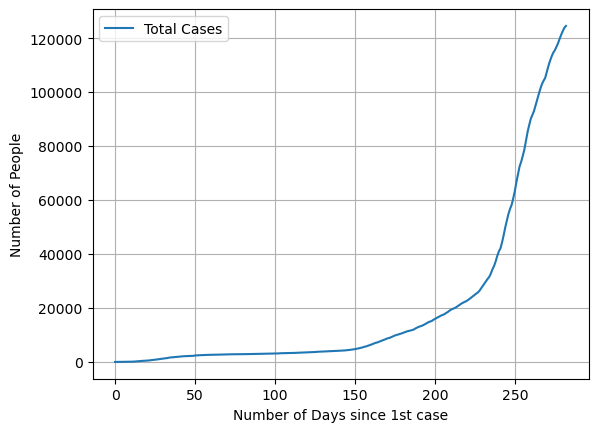

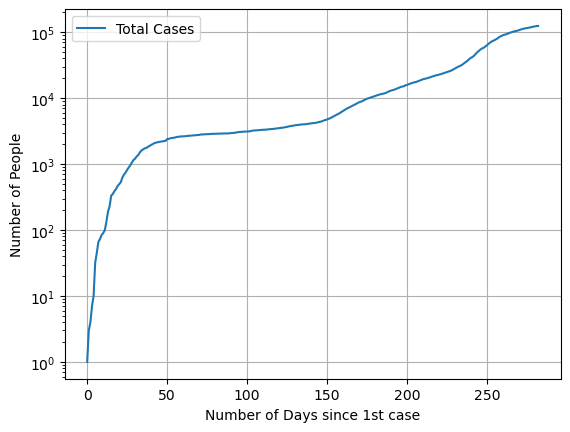

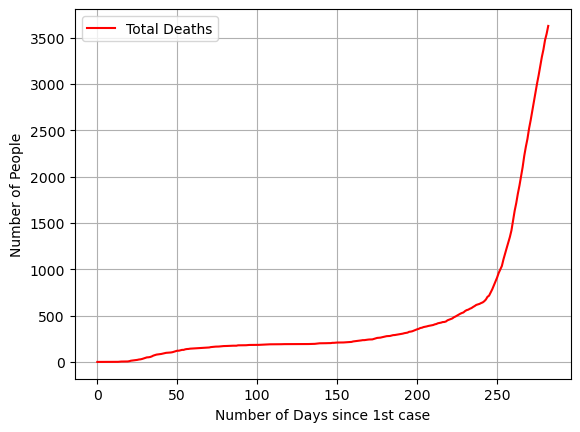

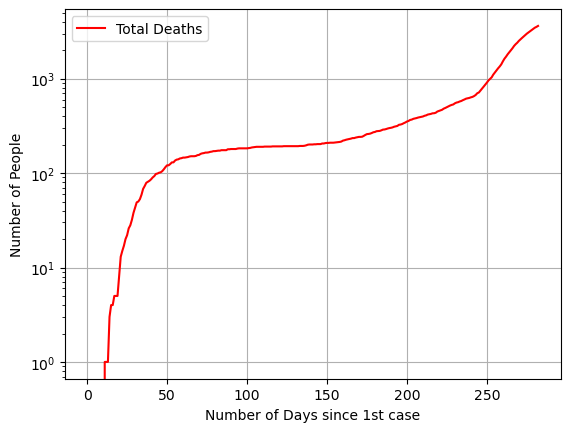

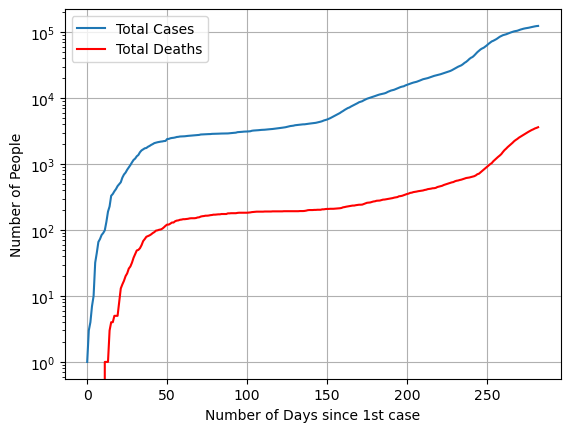

In [10]:
basic_diags(greece)

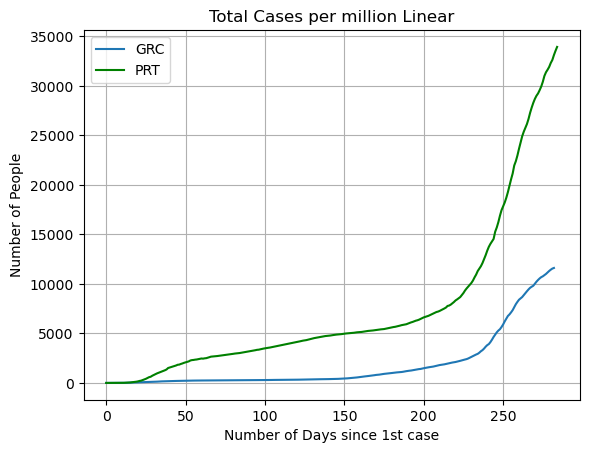

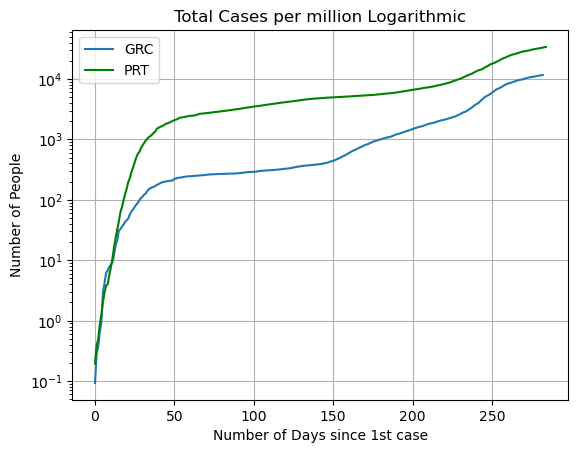

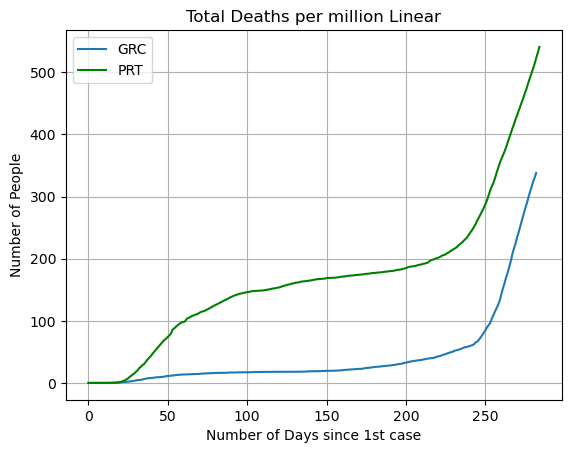

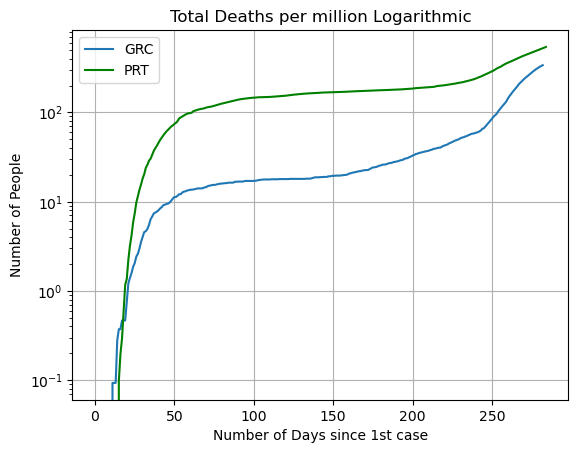

In [11]:
compare(greece,portugal)

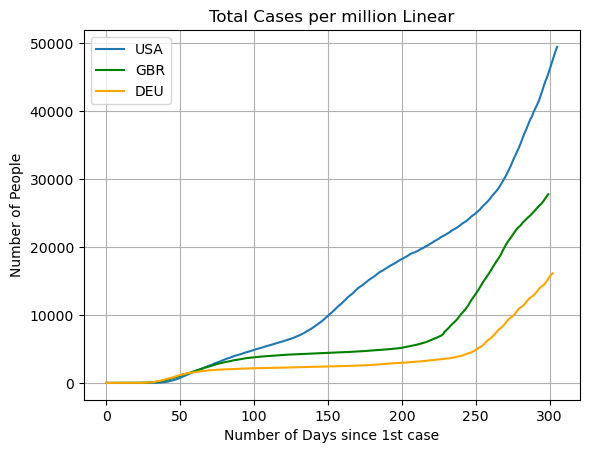

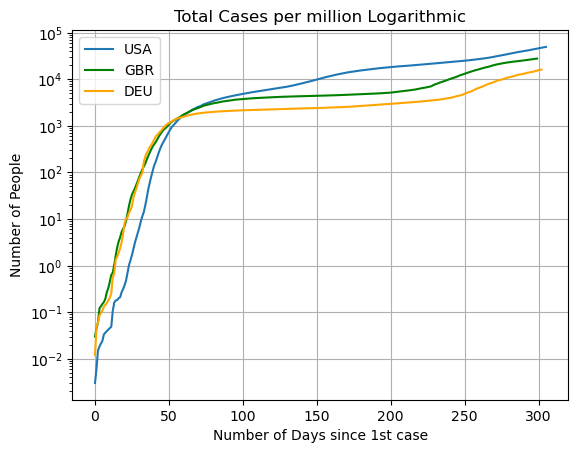

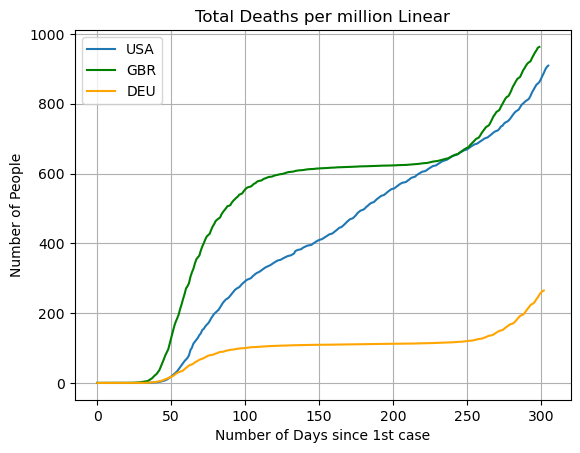

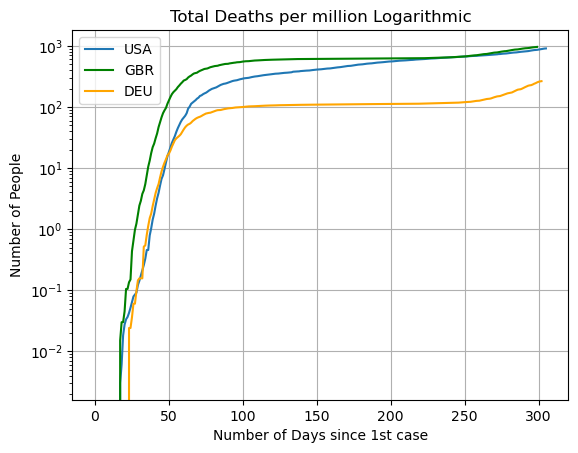

In [12]:
compare(usa,uk,germany)